<a href="https://colab.research.google.com/github/iakovkh/mypython/blob/main/LSTM_example3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

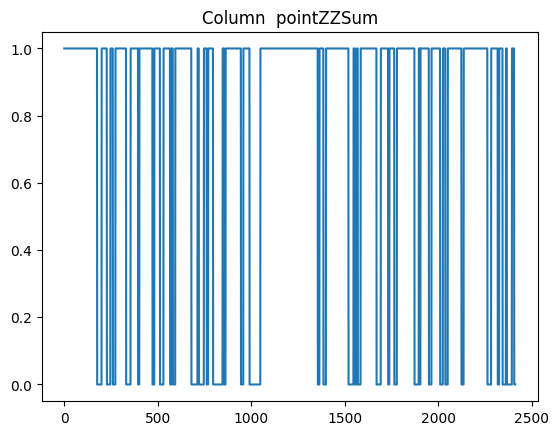

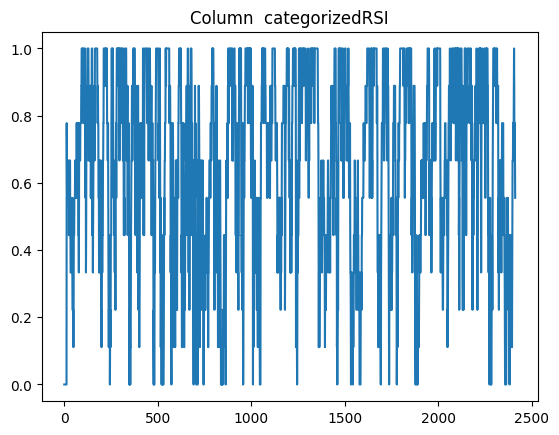

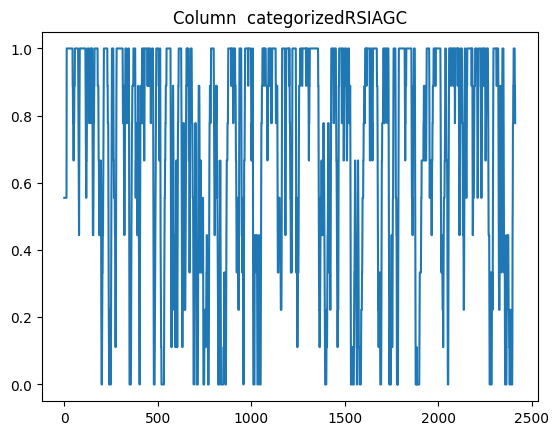

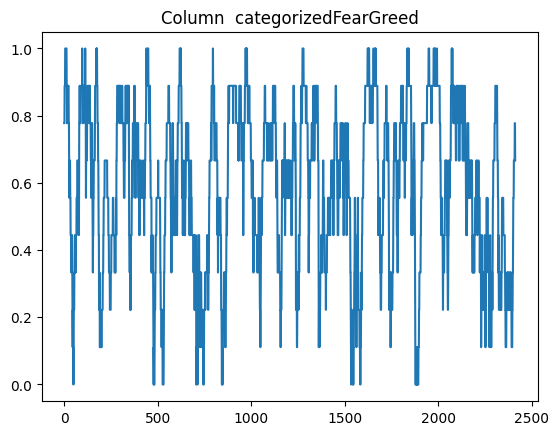

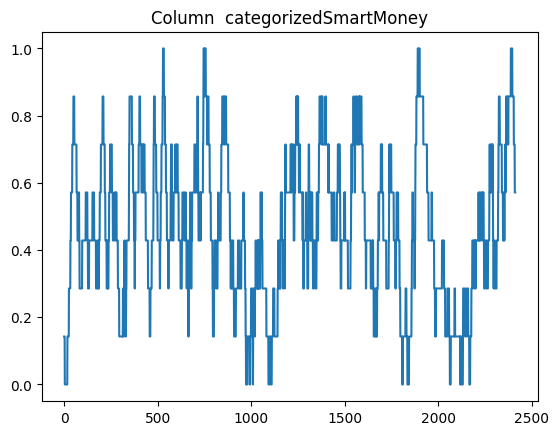

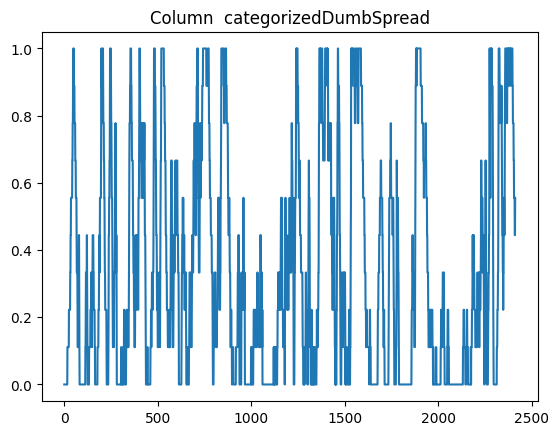

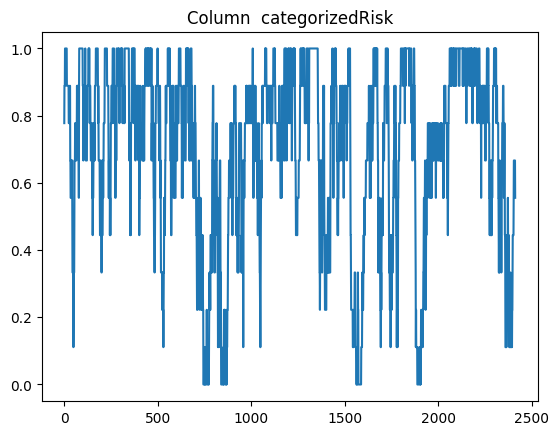

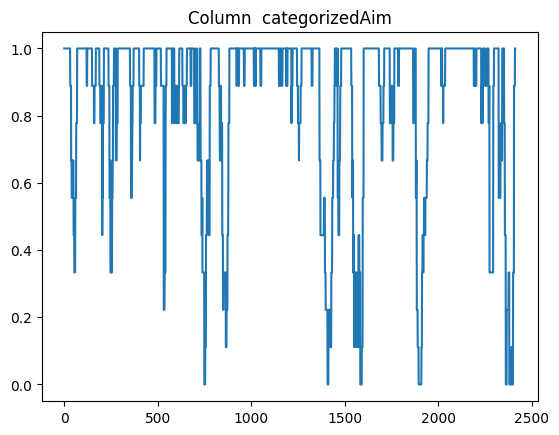

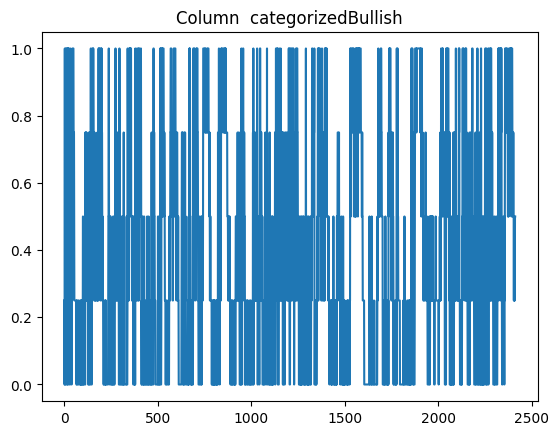

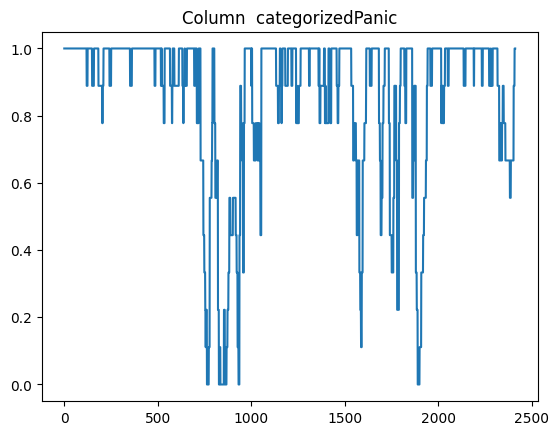

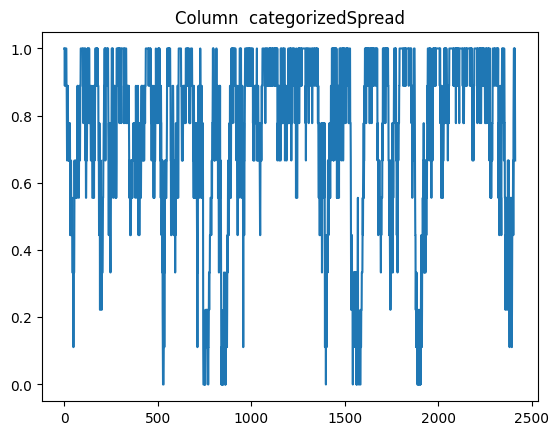

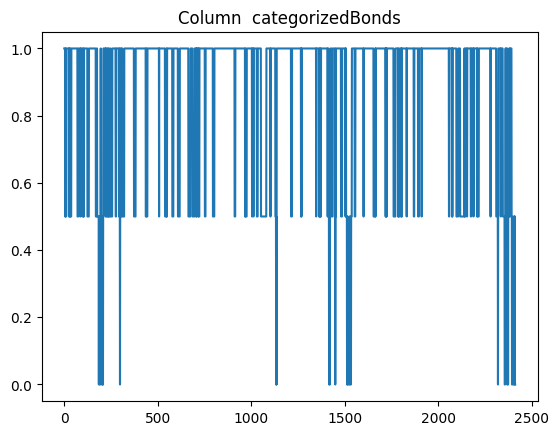

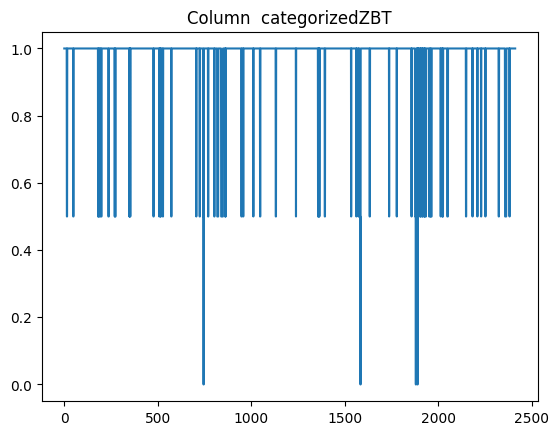

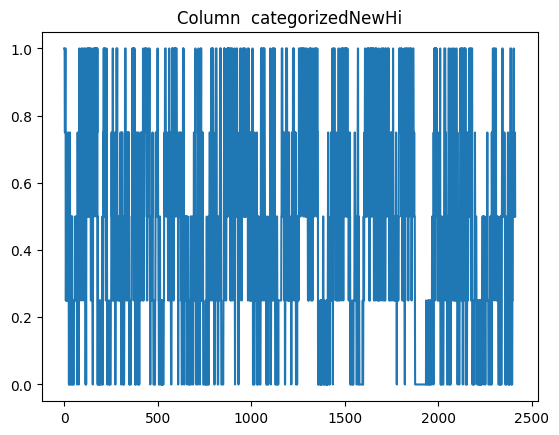

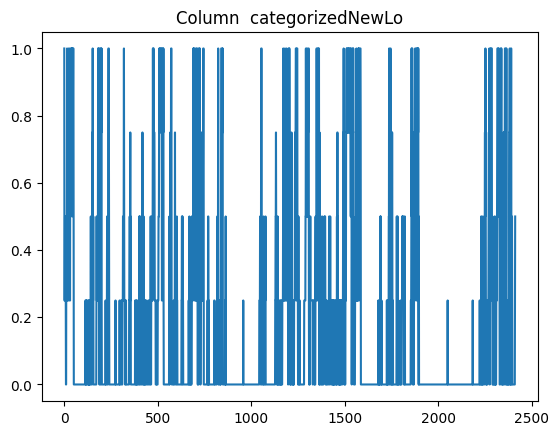

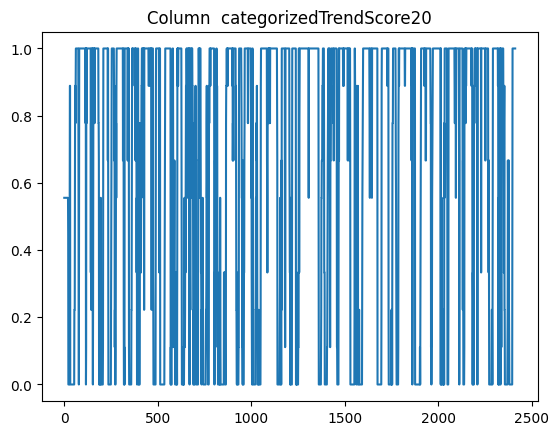

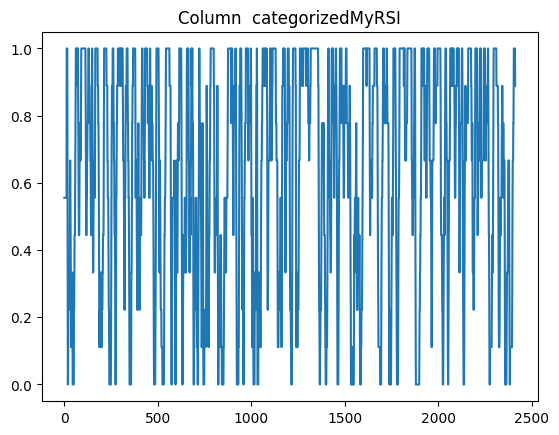

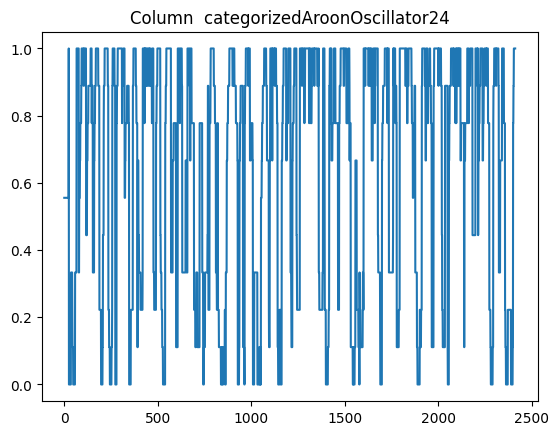

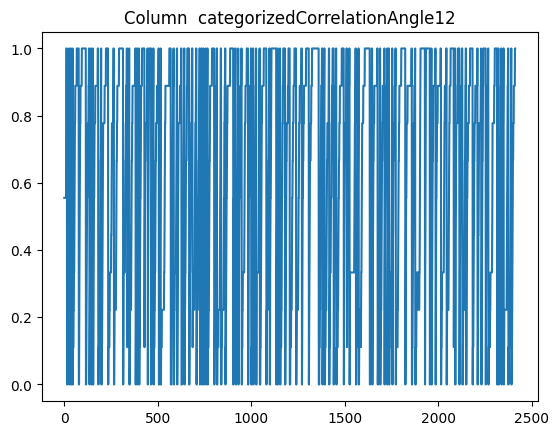

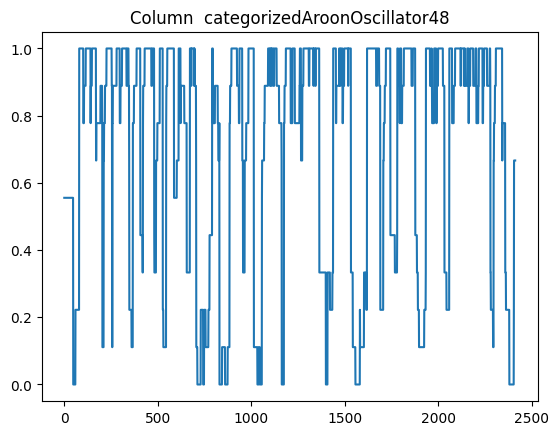

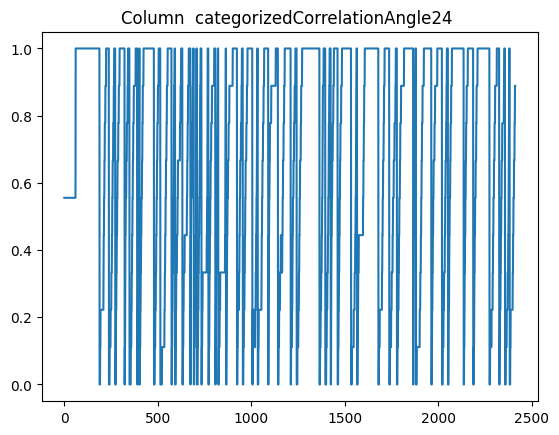

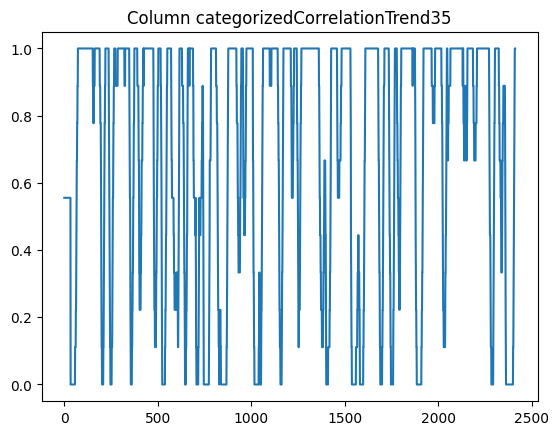

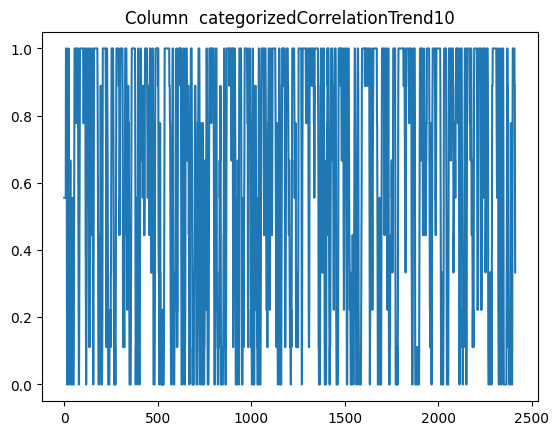

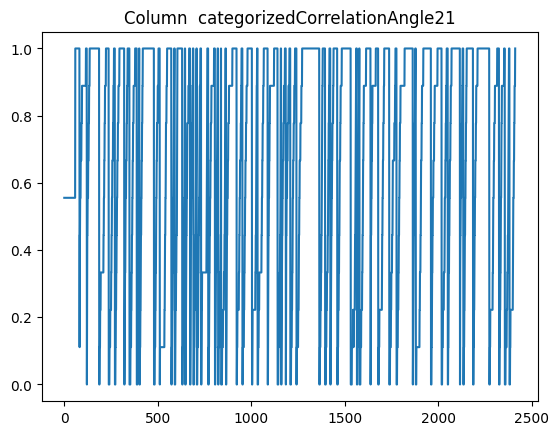

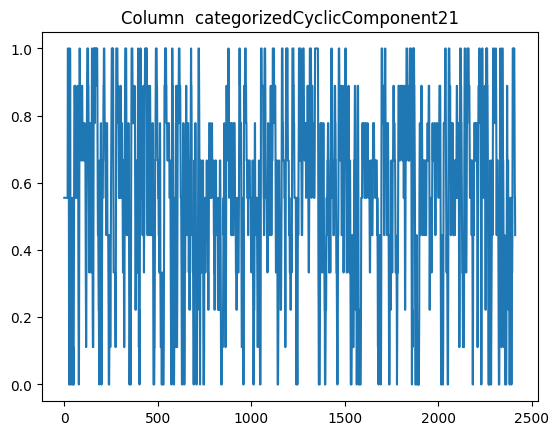

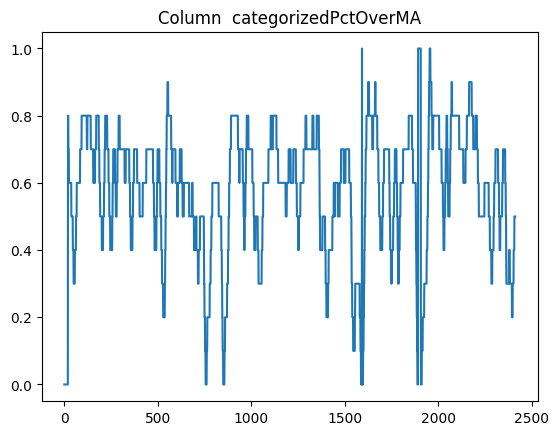

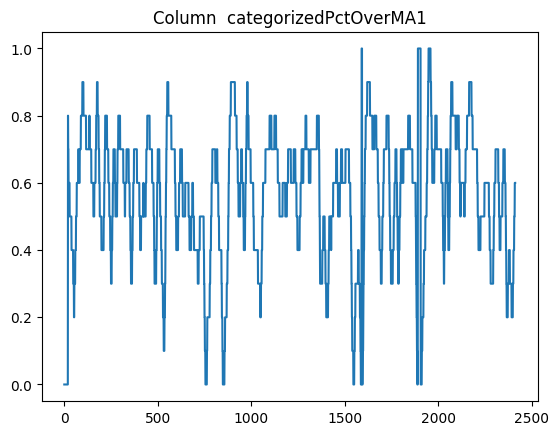

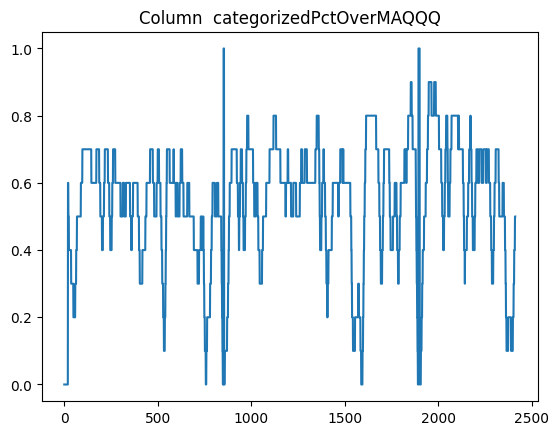

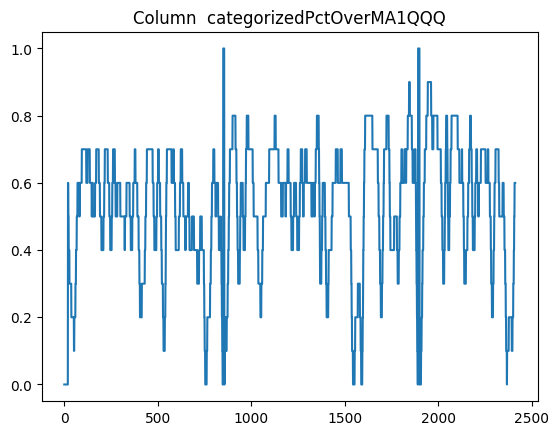

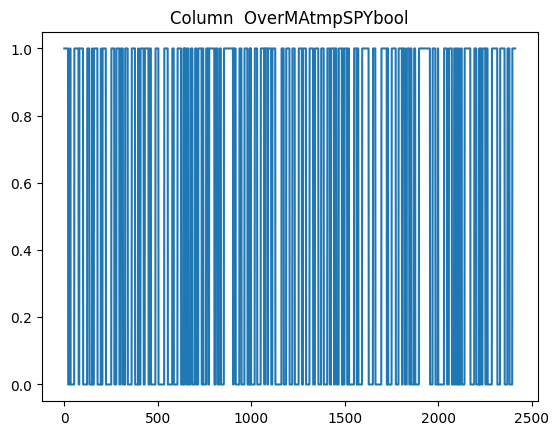

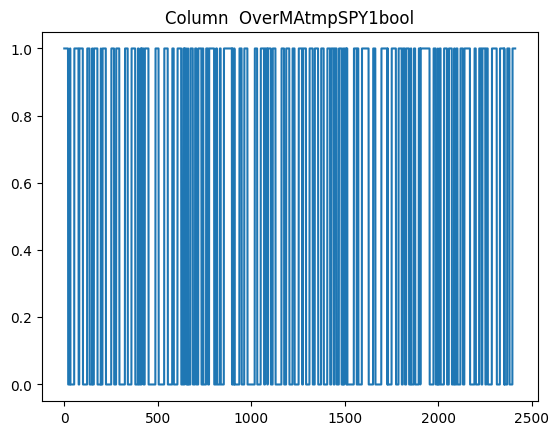

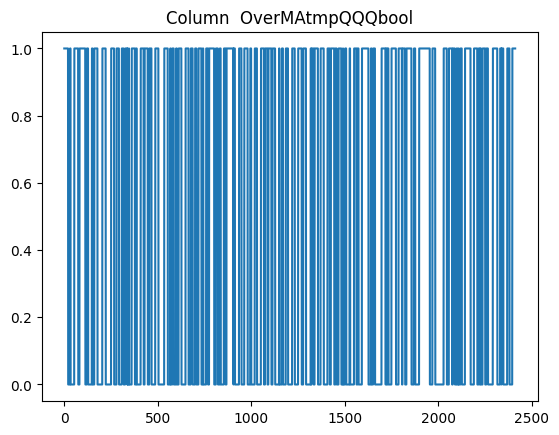

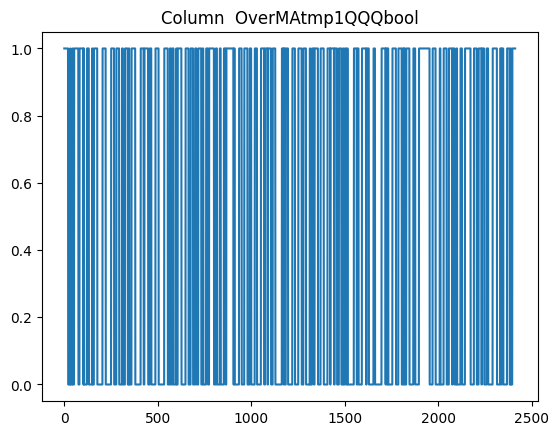

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5433.4888
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 62.6059
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 32.5606
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 22.6021
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 16.1344
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 12.7861
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.9568
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.0169
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9036
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5505
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


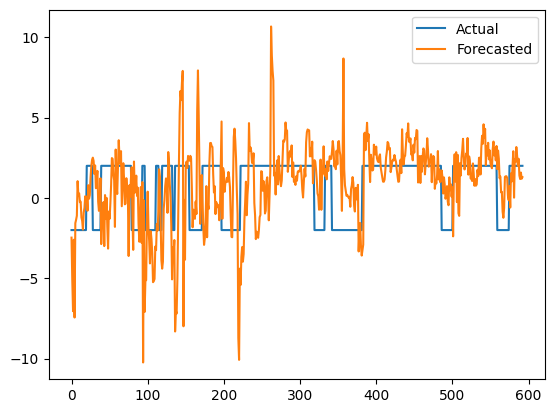

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1.1: Create a class MyMatrix
class MyMatrix:
    def __init__(self):
        self.data = None
        self.scaler = MinMaxScaler()

    # Step 1.2: Add a method read_data_from_file to class MyMatrix
    def read_data_from_file(self, file_path):
        self.data = pd.read_excel(file_path)

    # Step 1.3: Add method normalize_data to class MyMatrix
    def normalize_data(self):
        self.data = pd.DataFrame(self.scaler.fit_transform(self.data), columns=self.data.columns)

    # Step 1.4: Add method display_console to class MyMatrix
    def display_console(self, column=None):
        if column:
            print(self.data[column])
        else:
            print(self.data)

    # Step 1.5: Add method display_visual to class MyMatrix
    def display_visual(self, column=None):
        if column:
            plt.plot(self.data[column])
            plt.title(f'Column {column}')
            plt.show()
        else:
            for col in self.data.columns:
                plt.figure()
                plt.plot(self.data[col])
                plt.title(f'Column {col}')
                plt.show()

    # Step 1.6: Add method split_data to class MyMatrix
    def split_data(self, max_rows=200):
        return [self.data.iloc[i:i + max_rows] for i in range(0, len(self.data), max_rows)]

# Step 1.7: Create an object of MyMatrix class
matrix = MyMatrix()

# Step 1.8: Read the data from the file NN.xlsx
matrix.read_data_from_file('/content/sample_data/NN.xlsx')

# Step 1.9: Use first 80% of the data for next actions and keep 20% of data for testing
train_size = int(len(matrix.data) * 0.8)
train_data = matrix.data.iloc[:train_size]
test_data = matrix.data.iloc[train_size:]

# Step 1.10: Normalize the data
matrix.data = train_data
matrix.normalize_data()

# Step 1.11: Display the entire data
matrix.display_visual()

# Step 1.12: Split the data
samples = matrix.split_data()

# Step 1.13: Reshape the split data for LSTM neural network
def reshape_for_lstm(data, n_steps=1):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data.iloc[i:i + n_steps, 1:].values)
        y.append(data.iloc[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 10
X_train, y_train = reshape_for_lstm(train_data, n_steps)
X_test, y_test = reshape_for_lstm(test_data, n_steps)

# Step 1.14: Create an LSTM neural network with 10 epochs and 40 neurons
model = Sequential()
model.add(LSTM(40, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 1.15: Use the reshaped data to feed the neural network
model.fit(X_train, y_train, epochs=10, verbose=1)

# Step 1.16: Test the results using the put aside 20% data set
y_pred = model.predict(X_test)

# Step 1.17: Visualize training data, forecasted values, and actual values
plt.figure()
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Forecasted')
plt.legend()
plt.show()